In [11]:
!pip install sqlalchemy --quiet

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10,6)
sns.set_palette("viridis")

In [13]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)

In [14]:
print("Dimensiones:", df.shape)
df.info()

Dimensiones: (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [15]:
df = df.drop_duplicates()
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df = df.dropna(subset=['Description', 'Country'])
print("Dataset limpio ->", df.shape)

Dataset limpio -> (524878, 8)


In [16]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,132186
Country,0


In [17]:
df['CustomerID'] = df['CustomerID'].fillna(-1).astype(int)

In [18]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,1,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,1,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,1,Wednesday


In [19]:
df.to_csv("ventas_final.csv", index=False)
engine = create_engine("sqlite:///ventas_lab.db")
df.to_sql("ventas", con=engine, if_exists="replace", index=False)
print("ETL completo ✅")

ETL completo ✅


In [20]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,524878.0,19960.0,573585.0,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,524878,3922,85123A,2253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,524878,4026,WHITE HANGING HEART T-LIGHT HOLDER,2311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,524878.0,NaN,NaN,NaN,10.6166,1.0,1.0,4.0,11.0,80995.0,156.280031
InvoiceDate,524878,NaN,NaN,NaN,2011-07-04 15:30:16.317049088,2010-12-01 08:26:00,2011-03-28 12:13:00,2011-07-20 11:22:00,2011-10-19 11:41:00,2011-12-09 12:50:00,NaN
UnitPrice,524878.0,NaN,NaN,NaN,3.922573,0.001,1.25,2.08,4.13,13541.33,36.093028
CustomerID,524878.0,NaN,NaN,NaN,11437.480323,-1.0,-1.0,14350.0,16245.0,18287.0,6799.937261
Country,524878,38,United Kingdom,479985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalPrice,524878.0,NaN,NaN,NaN,20.275399,0.001,3.9,9.92,17.7,168469.6,271.693566
Year,524878.0,NaN,NaN,NaN,2010.921904,2010.0,2011.0,2011.0,2011.0,2011.0,0.268323


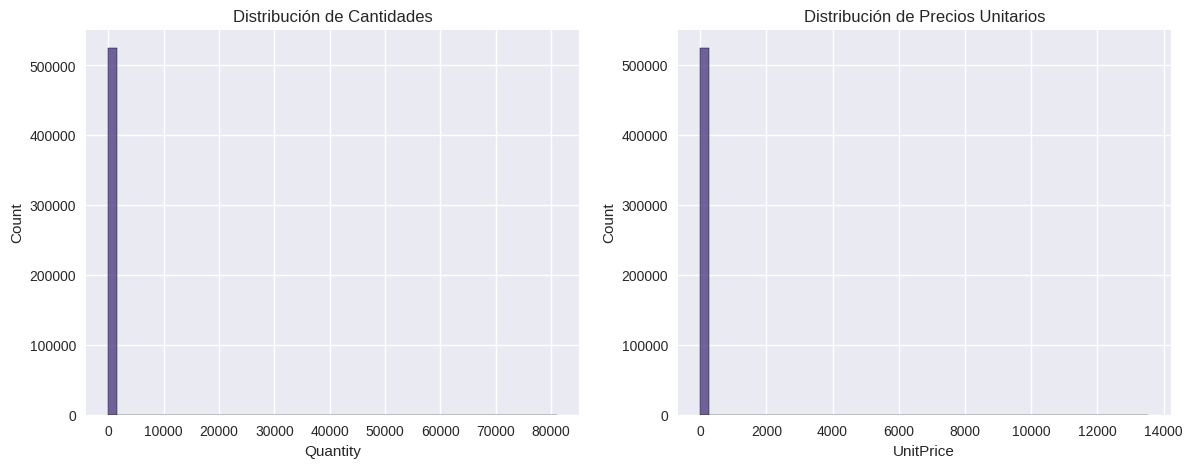

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Quantity'], bins=50, ax=ax[0])
ax[0].set_title("Distribución de Cantidades")
sns.histplot(df['UnitPrice'], bins=50, ax=ax[1])
ax[1].set_title("Distribución de Precios Unitarios")
plt.show()

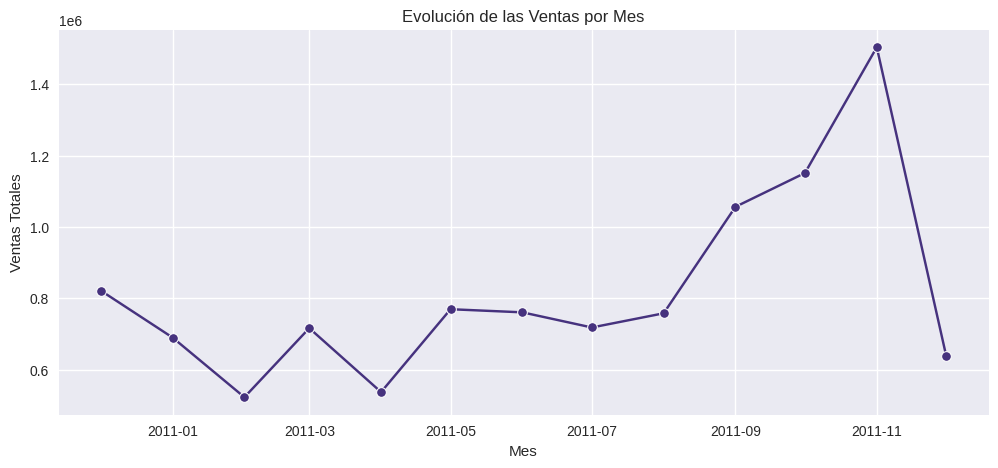

In [22]:
ventas_mes = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
ventas_mes['Fecha'] = pd.to_datetime(ventas_mes['Year'].astype(str) + "-" + ventas_mes['Month'].astype(str) + "-01")
plt.figure(figsize=(12,5))
sns.lineplot(data=ventas_mes, x='Fecha', y='TotalPrice', marker='o')
plt.title("Evolución de las Ventas por Mes")
plt.xlabel("Mes")
plt.ylabel("Ventas Totales")
plt.show()

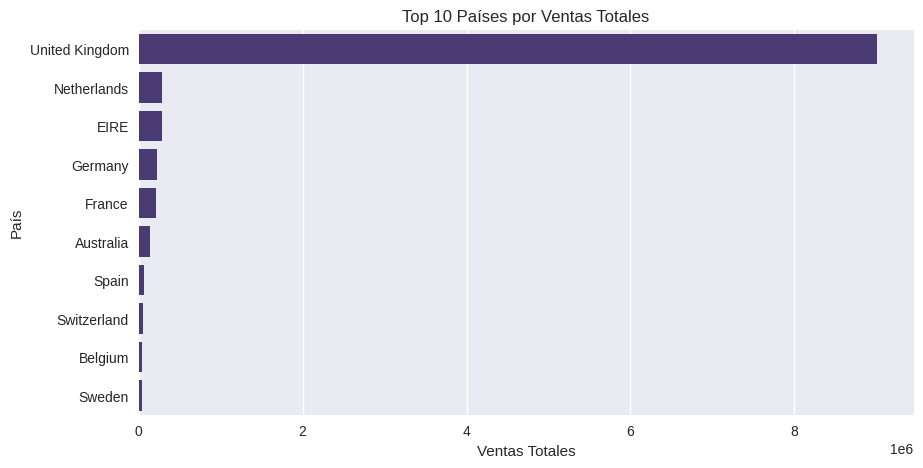

,TotalPrice
Country,
United Kingdom,9001744.094
Netherlands,285446.340
EIRE,283140.520
Germany,228678.400
France,209625.370
Australia,138453.810
Spain,61558.560
Switzerland,57067.600
Belgium,41196.340


In [23]:
top_paises = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_paises.values, y=top_paises.index)
plt.title("Top 10 Países por Ventas Totales")
plt.xlabel("Ventas Totales")
plt.ylabel("País")
plt.show()
top_paises

In [24]:
ventas_pais = df.groupby('Country')['TotalPrice'].sum().reset_index().sort_values('TotalPrice', ascending=False)
ventas_pais.head(5)

,Country,TotalPrice
36,United Kingdom,9001744.094
24,Netherlands,285446.340
10,EIRE,283140.520
14,Germany,228678.400
13,France,209625.370


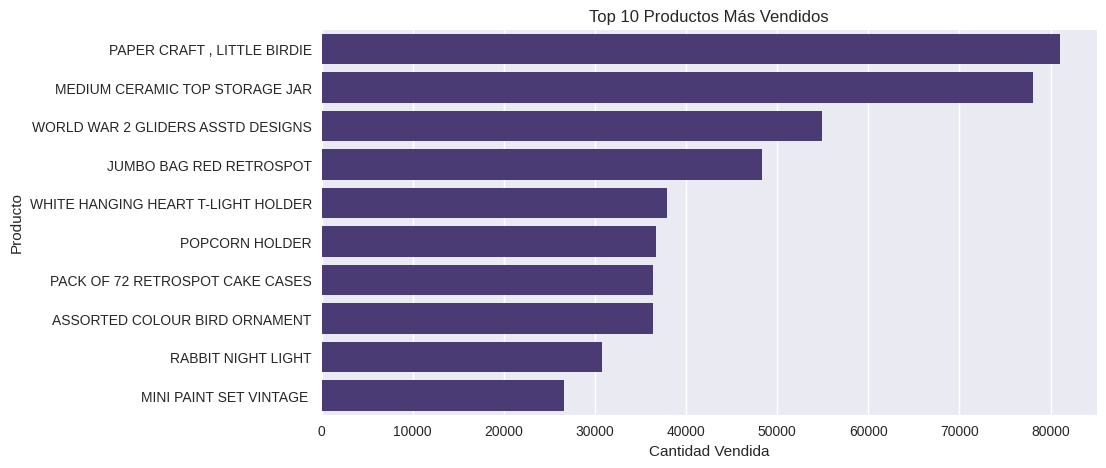

,Description,Quantity
2387,"PAPER CRAFT , LITTLE BIRDIE",80995
2052,MEDIUM CERAMIC TOP STORAGE JAR,78033
3934,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
1816,JUMBO BAG RED RETROSPOT,48371
3844,WHITE HANGING HEART T-LIGHT HOLDER,37872
2681,POPCORN HOLDER,36749
2337,PACK OF 72 RETROSPOT CAKE CASES,36396
227,ASSORTED COLOUR BIRD ORNAMENT,36362
2741,RABBIT NIGHT LIGHT,30739
2107,MINI PAINT SET VINTAGE,26633


In [25]:
top_productos = df.groupby('Description')['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top_productos, x='Quantity', y='Description')
plt.title("Top 10 Productos Más Vendidos")
plt.xlabel("Cantidad Vendida")
plt.ylabel("Producto")
plt.show()
top_productos

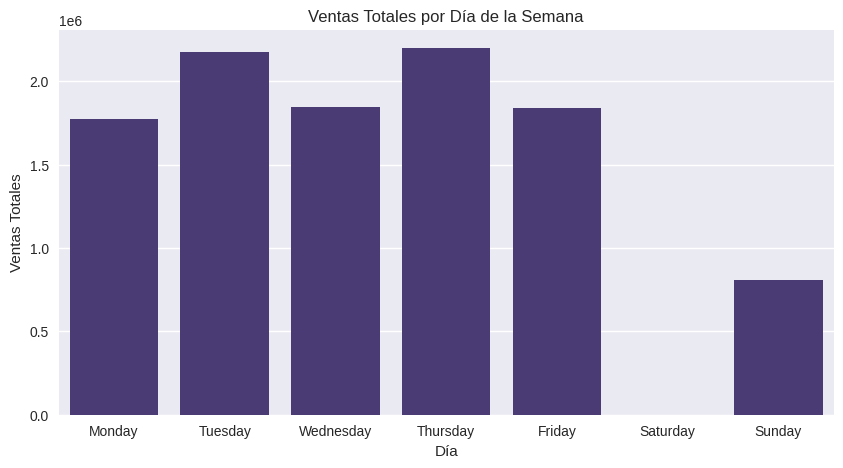

,Weekday,TotalPrice
0,Friday,1837470.491
1,Monday,1775782.071
2,Sunday,806790.781
3,Thursday,2199292.570
4,Tuesday,2175700.511
5,Wednesday,1847074.380


In [26]:
ventas_dia = df.groupby('Weekday')['TotalPrice'].sum().reset_index()
orden_dias = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ventas_dia['Weekday'] = pd.Categorical(ventas_dia['Weekday'], categories=orden_dias, ordered=True)
plt.figure(figsize=(10,5))
sns.barplot(data=ventas_dia, x='Weekday', y='TotalPrice')
plt.title("Ventas Totales por Día de la Semana")
plt.xlabel("Día")
plt.ylabel("Ventas Totales")
plt.show()
ventas_dia